In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pickle
with open('/content/gdrive/My Drive/Colab Notebooks/final_data.pkl', 'rb') as handle:
    data = pickle.load(handle)

In [ ]:
data.shape

(364159, 13)

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Cleanedsummary,Cleaned
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...,b'everi book educ',b'witti littl book make son laugh loud recit c...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...,b'whole seri great way spend time child',b'rememb see show air televis year ago child s...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...,b'entertainingl funni',b'beetlejuic well written movi everyth excel a...
374358,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...,b'modern day fairi tale',b'twist rumplestiskin captur film star michael...
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...,b'fantast',b'beetlejuic excel funni movi keaton hilari wa...


In [ ]:
final_data = data[:50000]

In [ ]:
from sklearn.model_selection import train_test_split
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(final_data['Text'].values, final_data['Score'].values,stratify =final_data['Score'],
                                                             test_size=0.3, random_state=42)


In [ ]:
l = max([len(text.split()) for text in final_data['Text'].values])
print (l)

1818


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


max_length =800
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

Using TensorFlow backend.


In [ ]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
X_train = standardize.fit_transform(X_train)
X_test = standardize.transform(X_test)

In [ ]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(4000,32, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           128000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 181,301
Trainable params: 181,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

W0614 18:23:38.540522 140278522865536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 405s 12ms/step - loss: 0.1758 - acc: 0.9331 - val_loss: 0.2220 - val_acc: 0.9232
Epoch 3/10
35000/35000 [==============================] - 405s 12ms/step - loss: 0.1410 - acc: 0.9477 - val_loss: 0.2071 - val_acc: 0.9285
Epoch 4/10
35000/35000 [==============================] - 407s 12ms/step - loss: 0.1241 - acc: 0.9560 - val_loss: 0.2112 - val_acc: 0.9275
Epoch 5/10
35000/35000 [==============================] - 407s 12ms/step - loss: 0.1147 - acc: 0.9603 - val_loss: 0.2067 - val_acc: 0.9242
Epoch 6/10
35000/35000 [==============================] - 405s 12ms/step - loss: 0.1033 - acc: 0.9639 - val_loss: 0.2160 - val_acc: 0.9227
Epoch 7/10
35000/35000 [==============================] - 406s 12ms/step - loss: 0.0971 - acc: 0.9667 - val_loss: 0.2365 - val_acc: 0.9090
Epoch 8/10
35000/35000 [==============================] - 402s 11ms/step - loss: 0.0813 - acc: 0.9732 - val_loss: 0.

Test score: 0.28931082324683666
Test accuracy: 0.9206666666666666


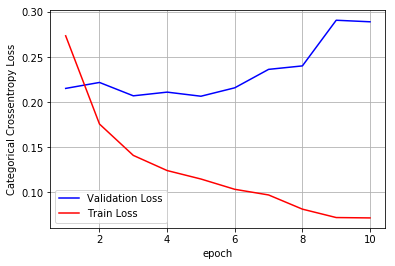

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# create the model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

num_words = 4000
vecor_dim = 64
model = Sequential()
model.add(Embedding(num_words,vecor_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(1-0.5))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dropout(1-0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 600, 64)           256000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 600, 128)          98816     
_________________________________________________________________
dropout_5 (Dropout)          (None, 600, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
__________

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 904s 26ms/step - loss: 0.2846 - acc: 0.8967 - val_loss: 0.2904 - val_acc: 0.8983
Epoch 2/10
35000/35000 [==============================] - 904s 26ms/step - loss: 0.1743 - acc: 0.9324 - val_loss: 0.2655 - val_acc: 0.9142
Epoch 3/10
35000/35000 [==============================] - 904s 26ms/step - loss: 0.1440 - acc: 0.9433 - val_loss: 0.2652 - val_acc: 0.9058
Epoch 4/10
35000/35000 [==============================] - 900s 26ms/step - loss: 0.1169 - acc: 0.9556 - val_loss: 0.2481 - val_acc: 0.9015
Epoch 5/10
35000/35000 [==============================] - 902s 26ms/step - loss: 0.0981 - acc: 0.9624 - val_loss: 0.2525 - val_acc: 0.9014
Epoch 6/10
35000/35000 [==============================] - 902s 26ms/step - loss: 0.0772 - acc: 0.9702 - val_loss: 0.3347 - val_acc: 0.9195
Epoch 7/10
35000/35000 [==============================] - 903s 26ms/step - loss: 0.0645 - acc: 0.9752 - val_loss: 0.

Test score: 0.4612991584535843
Test accuracy: 0.9177333333333333


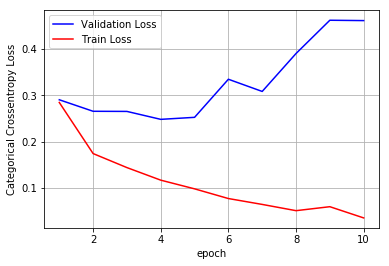

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# create the model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)
num_words = 4000
vecor_dim = 32
batch_size = 512
epochs = 30
model = Sequential()
model.add(Embedding(num_words,vecor_dim, input_length=max_length))
model.add(LSTM(100))
model.add(Dropout(1-0.5))
#model.add(LSTM(64))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
#model.add(Dropout(1-0.8))
#model.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,class_weight=class_weight, verbose=1, validation_data=(X_test, y_test))


Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 489s 14ms/step - loss: 0.6498 - acc: 0.8362 - val_loss: 0.5801 - val_acc: 0.8876
Epoch 2/30
35000/35000 [==============================] - 484s 14ms/step - loss: 0.5473 - acc: 0.8863 - val_loss: 0.5181 - val_acc: 0.8876
Epoch 3/30
35000/35000 [==============================] - 487s 14ms/step - loss: 0.4527 - acc: 0.8875 - val_loss: 0.4380 - val_acc: 0.8875
Epoch 4/30
35000/35000 [==============================] - 490s 14ms/step - loss: 0.3922 - acc: 0.8875 - val_loss: 0.3763 - val_acc: 0.8876
Epoch 5/30
35000/35000 [==============================] - 493s 14ms/step - loss: 0.3668 - acc: 0.8862 - val_loss: 0.3673 - val_acc: 0.8876
Epoch 6/30
35000/35000 [==============================] - 491s 14ms/step - loss: 0.3530 - acc: 0.8875 - val_loss: 0.3489 - val_acc: 0.8875
Epoch 7/30
35000/35000 [==============================] - 486s 14ms/step - loss: 0.3504 - acc: 0.8875 - val_loss: 0.

Test score: 0.34940680960019427
Test accuracy: 0.8875999999682108


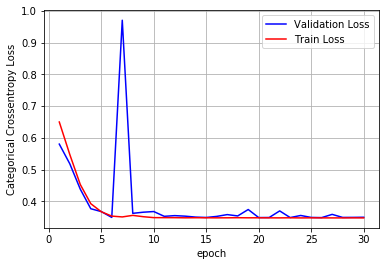

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# create the model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

from sklearn.metrics import roc_auc_score
import tensorflow as tf


In [ ]:
from sklearn.utils import class_weight
import keras.backend as K

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

#def auroc(y_true, y_pred):
    #return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
def aucroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())

num_words = 4000
vecor_dim = 64
batch_size = 128
epochs = 10
# create the model
model = Sequential()
model.add(Embedding(4000,32, input_length=max_length))
model.add(LSTM(100))
#model.add(Dropout(1-0.5))
#model.add(Dense(50, activation='sigmoid'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auroc])
#print(model.summary())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 383s 11ms/step - loss: 0.3637 - acc: 0.8873 - auroc: 0.5630 - val_loss: 0.3510 - val_acc: 0.8876 - val_auroc: 0.5506
Epoch 2/10
35000/35000 [==============================] - 394s 11ms/step - loss: 0.3503 - acc: 0.8876 - auroc: 0.5613 - val_loss: 0.3503 - val_acc: 0.8876 - val_auroc: 0.5507
Epoch 3/10
35000/35000 [==============================] - 394s 11ms/step - loss: 0.3509 - acc: 0.8875 - auroc: 0.5615 - val_loss: 0.3507 - val_acc: 0.8876 - val_auroc: 0.5500
Epoch 4/10
35000/35000 [==============================] - 393s 11ms/step - loss: 0.3505 - acc: 0.8875 - auroc: 0.5606 - val_loss: 0.3506 - val_acc: 0.8876 - val_auroc: 0.5532
Epoch 5/10
35000/35000 [==============================] - 395s 11ms/step - loss: 0.3505 - acc: 0.8875 - auroc: 0.5650 - val_loss: 0.3499 - val_acc: 0.8875 - val_auroc: 0.5574
Epoch 6/10
35000/35000 [==============================] - 394s 11ms/step - 

In [ ]:
y_pred = model.predict_proba(X_test)
print ('auc {0}'.format(roc_auc_score(y_test, y_pred)))

auc 0.5692526850766352


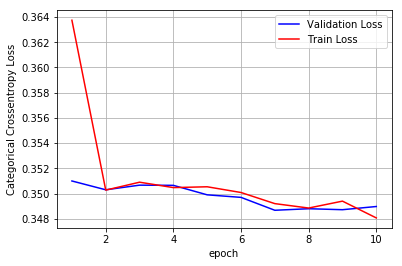

In [ ]:
#score = model.evaluate(X_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
from sklearn.utils import class_weight
import keras.backend as K

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

#def auroc(y_true, y_pred):
    #return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
def aucroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())

num_words = 4000
vecor_dim = 64
batch_size = 128
epochs = 10
# create the model
model = Sequential()
model.add(Embedding(4000,32, input_length=max_length))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(1-0.5))
model.add(LSTM(50))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(1-0.5))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auroc])
#print(model.summary())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),class_weight=class_weight)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 703s 20ms/step - loss: 0.4091 - acc: 0.8711 - auroc: 0.5139 - val_loss: 0.3642 - val_acc: 0.8876 - val_auroc: 0.5082
Epoch 2/10
35000/35000 [==============================] - 715s 20ms/step - loss: 0.3599 - acc: 0.8876 - auroc: 0.5375 - val_loss: 0.3570 - val_acc: 0.8876 - val_auroc: 0.5584
Epoch 3/10
35000/35000 [==============================] - 720s 21ms/step - loss: 0.3572 - acc: 0.8875 - auroc: 0.5416 - val_loss: 0.5398 - val_acc: 0.8876 - val_auroc: 0.5692
Epoch 4/10
35000/35000 [==============================] - 721s 21ms/step - loss: 0.3571 - acc: 0.8876 - auroc: 0.5417 - val_loss: 1.2478 - val_acc: 0.8876 - val_auroc: 0.5651
Epoch 5/10
35000/35000 [==============================] - 719s 21ms/step - loss: 0.3568 - acc: 0.8876 - auroc: 0.5390 - val_loss: 0.3493 - val_acc: 0.8876 - val_auroc: 0.5708
Epoch 6/10
35000/35000 [==============================] - 722s 21ms/step - 

In [ ]:
y_pred = model.predict_proba(X_test)
print ('auc {0}'.format(roc_auc_score(y_test, y_pred)))

auc 0.565957738364757


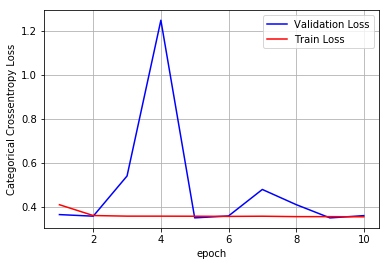

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# create the model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from sklearn.utils import class_weight
import keras.backend as K
import tensorflow as tf
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

def aucroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
'''def aucroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
'''
best_model = ModelCheckpoint('best_model.h5', monitor='val_aucroc', mode='max', verbose=0, save_best_only=True)
num_words = 4000
vecor_dim = 64
epochs=10
batch_size=128
model = Sequential()
model.add(Embedding(num_words,vecor_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(1-0.8))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64))
model.add(Dropout(1-0.8))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(1-0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',aucroc])
#print(model.summary())
model.save('my_model.h5')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),class_weight=class_weight,callbacks=[best_model])
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1620s 46ms/step - loss: 0.2797 - acc: 0.8977 - aucroc: 0.7775 - val_loss: 0.2137 - val_acc: 0.9205 - val_aucroc: 0.9239
Epoch 2/10
35000/35000 [==============================] - 1624s 46ms/step - loss: 0.1802 - acc: 0.9317 - aucroc: 0.9383 - val_loss: 0.2246 - val_acc: 0.9141 - val_aucroc: 0.9307
Epoch 3/10
35000/35000 [==============================] - 1626s 46ms/step - loss: 0.1560 - acc: 0.9419 - aucroc: 0.9529 - val_loss: 0.2113 - val_acc: 0.9126 - val_aucroc: 0.9218
Epoch 4/10
35000/35000 [==============================] - 1628s 47ms/step - loss: 0.1367 - acc: 0.9512 - aucroc: 0.9637 - val_loss: 0.2116 - val_acc: 0.9097 - val_aucroc: 0.9334
Epoch 5/10
35000/35000 [==============================] - 1635s 47ms/step - loss: 0.1154 - acc: 0.9583 - aucroc: 0.9750 - val_loss: 0.2900 - val_acc: 0.9252 - val_aucroc: 0.8924
Epoch 6/10
35000/35000 [==============================] - 16

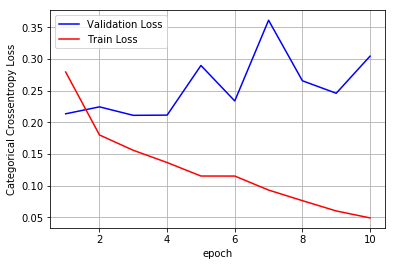

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

auc 0.8957787947327895


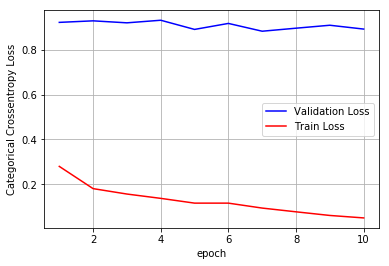

In [ ]:
'''score = model.evaluate(X_test, y_test) 
"print('Test score:', score[0]) 
"print('Test accuracy:', score[1])
"print('Test auc:', score[2])'''
y_pred = model.predict_proba(X_test)
print ('auc {0}'.format(roc_auc_score(y_test, y_pred)))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_aucroc']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# create the model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from sklearn.utils import class_weight
import keras.backend as K
import tensorflow as tf
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

'''def aucroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)'''
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

#best_model = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', verbose=0, save_best_only=True)
num_words = 4000
vecor_dim = 64
epochs=10
batch_size=128

# create the model
model = Sequential()
model.add(Embedding(4000,32, input_length=max_length))
model.add(LSTM(100))
model.add(Dropout(1-0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-modelmodel.save('my_model.h5')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),class_weight=class_weight)
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 800, 32)           128000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 181,301
Trainable params: 181,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 516s 15ms/step - loss: 0.2921 - acc: 0.8967 - auc: 0.6481 - val_loss: 0.2082 - val_acc: 0.9219 - val_auc: 0.8162
Epoch 2/10
35000/35000 [==================

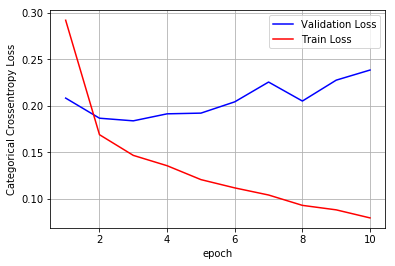

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

15000/15000 [==============================] - 64s 4ms/step
Test score: 0.23844848267336685
Test accuracy: 0.9256
Test auc: 0.9476831339200338


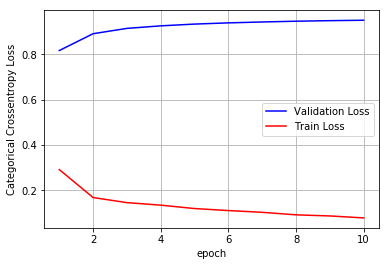

In [ ]:
score = model.evaluate(X_test, y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('Test auc:', score[2])
#y_pred = model.predict_proba(X_test)
#print ('auc {0}'.format(roc_auc_score(y_test, y_pred)))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_auc']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
from sklearn.utils import class_weight
import keras.backend as K

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

#def auroc(y_true, y_pred):
    #return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

num_words = 4000
vecor_dim = 32
batch_size = 128
epochs = 10
# create the model
model = Sequential()
model.add(Embedding(4000,32, input_length=max_length))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(1-0.8))
model.add(LSTM(50))
model.add(Dropout(1-0.8))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(1-0.8))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc])
#print(model.summary())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),class_weight=class_weight)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 943s 27ms/step - loss: 0.3139 - acc: 0.8828 - auc: 0.7370 - val_loss: 0.1939 - val_acc: 0.9254 - val_auc: 0.8328
Epoch 2/10
35000/35000 [==============================] - 954s 27ms/step - loss: 0.1771 - acc: 0.9335 - auc: 0.8720 - val_loss: 0.2002 - val_acc: 0.9244 - val_auc: 0.8899
Epoch 3/10
35000/35000 [==============================] - 956s 27ms/step - loss: 0.1426 - acc: 0.9479 - auc: 0.9045 - val_loss: 0.2022 - val_acc: 0.9253 - val_auc: 0.9128
Epoch 4/10
35000/35000 [==============================] - 953s 27ms/step - loss: 0.1147 - acc: 0.9593 - auc: 0.9207 - val_loss: 0.2440 - val_acc: 0.9285 - val_auc: 0.9247
Epoch 5/10
35000/35000 [==============================] - 951s 27ms/step - loss: 0.0957 - acc: 0.9672 - auc: 0.9292 - val_loss: 0.2436 - val_acc: 0.9252 - val_auc: 0.9318
Epoch 6/10
35000/35000 [==============================] - 949s 27ms/step - loss: 0.0790 - acc: 

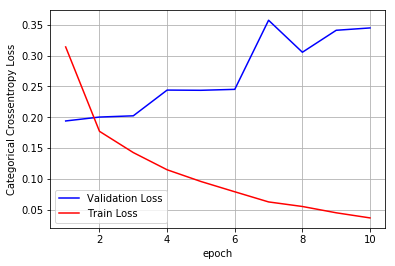

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

15000/15000 [==============================] - 115s 8ms/step
Test score: 0.34476587611536186
Test accuracy: 0.9231999999682109
Test auc: 0.9473308059374491


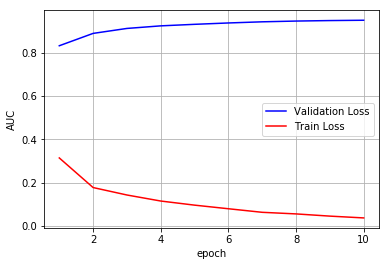

In [ ]:
score = model.evaluate(X_test, y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('Test auc:', score[2])
#y_pred = model.predict_proba(X_test)
#print ('auc {0}'.format(roc_auc_score(y_test, y_pred)))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('AUC')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_auc']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)